In [10]:
import csv
import re
import os
from tqdm import tqdm
import pandas as pd

import matplotlib.pyplot as plt

DISTANCE_FROM_SCREEN = 62.0 #Distance between eyes and screen in cm
SCREEN_RESULUTION_WIDTH, SCREEN_RESULUTION_HEIGHT = 1920, 1080 #screen width and height in pixels (resulution)
SCREEN_WIDTH, SCREEN_HEIGHT = 59.8, 33.6 #screen width and height in cm

In [2]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def directory_spider(input_dir, path_pattern="", file_pattern="", maxResults=50000):
    file_paths = []
    if not os.path.exists(input_dir):
        raise FileNotFoundError("Could not find path: %s"%(input_dir))
    for dirpath, dirnames, filenames in os.walk(input_dir):
        if re.search(path_pattern, dirpath):
            file_list = [item for item in filenames if (item[-4:] == file_pattern)]
            file_path_list = [os.path.join(dirpath, item) for item in file_list]
            file_paths += file_path_list
            if len(file_paths) > maxResults:
                break
    return file_paths[0:maxResults]    

In [3]:
blink_header = ['Message', 'Eye', 'StartTime', 'EndTime', 'Duration']
saccade_header = ['Message', 'Eye', 'StartTime', 'EndTime', 'Duration', '']
fixation_header = ['Message', 'Eye', 'StartTime', 'EndTime', 'Duration',
                   'AverageXPosition', 'AverageYPosition', 'AveragePupilSize']
gaze_header = ['Time', 'X_L', 'Y_L', 'PupilSize_L', 'X_R', 'Y_R', 'PupilSize_R', 'ParticipantNr']
message_header = ['MSG', 'Time', 'Message']
mouse_header = ['Time', 'X','Y']

# Get all files that end for '.asc'
# Put them into the list called 'files'
# os.chdir('/Users/jessegrootjen/Documents/PhD/11_Data/Barraza_Bernal_Data_The retinal locus of fixation in simulations of progressing central scotomas')
files = sorted(directory_spider("/", file_pattern=".asc"))

In [4]:
files

['/System/Volumes/Data/Users/lights/PycharmProjects/practical-machine-learning/exercise01/27.asc',
 '/Users/lights/PycharmProjects/practical-machine-learning/exercise01/27.asc']

In [5]:
files[0]

'/System/Volumes/Data/Users/lights/PycharmProjects/practical-machine-learning/exercise01/27.asc'

In [8]:
# For each file that was found 

time_data = []

for file in tqdm(files):
    print(file)
    messages_data = []
    saccades_data = []
    fixations_data = []
    gaze_date = []
    blink_data = []

    # Read in file
    f = open(file)
    for line in f:
        line = line.split()
        if line:
            if line[0] == "MSG":
                messages_data.append(line)
            elif line[0] == "EFIX":
                fixations_data.append(line)
            elif line[0] == "ESACC":
                saccades_data.append(line)
            elif line[0] == "EBLINK":
                blink_data.append(line)
            elif isfloat(line[0]):
                gaze_date.append(line[:-1])

    file_name = file.split('/')[-1].split('.')[0]
    dir_name = file[0:-7]

    #print(dir_name, file_name)

    with open('test_messages.csv', 'w') as messages_csv:
        writer = csv.writer(messages_csv, delimiter=',')
        writer.writerow(message_header)
        for line in messages_data:
            if ('UNIX:') in line:
                # print(line)
                time_data.append(line)
            else:
                writer.writerow(line)
            # print(line)
            # break
    with open('test_mouse.csv', 'w') as messages_csv:
        writer = csv.writer(messages_csv, delimiter=',')
        writer.writerow(mouse_header)
        for line in messages_data:
            if not ("Pointer") in line:
                continue
            time = int(line[1])
            x = int(line[-2].replace("(", "").replace(",", ""))
            y = int(line[-1].replace(")", ""))
            writer.writerow([time, x, y])

    with open('test_saccades.csv', 'w') as saccades_csv:
        writer = csv.writer(saccades_csv, delimiter=',')
        writer.writerow(saccade_header)
        for line in saccades_data:
            writer.writerow(line)
            # print(line)
            # break


    with open('test_blink.csv', 'w') as blinks_csv:
        writer = csv.writer(blinks_csv, delimiter=',')
        writer.writerow(blink_header)
        for line in blink_data:
            writer.writerow(line)
            # print(line)
            # break


    with open('test_fixations.csv', 'w') as fixations_csv:
        writer = csv.writer(fixations_csv, delimiter=',')
        writer.writerow(fixation_header)
        for line in fixations_data:
            writer.writerow(line)
            # print(line)
            # break


    with open('test.csv', 'w') as gaze_csv:
        writer = csv.writer(gaze_csv, delimiter=',')
        writer.writerow(gaze_header)
        for line in gaze_date:
            if len(line) == 8:
                writer.writerow(line)
            # print(line)
            # break

    # break

print('Done')

  0%|          | 0/2 [00:00<?, ?it/s]

/System/Volumes/Data/Users/lights/PycharmProjects/practical-machine-learning/exercise01/27.asc


 50%|█████     | 1/2 [00:04<00:04,  4.76s/it]

/Users/lights/PycharmProjects/practical-machine-learning/exercise01/27.asc


100%|██████████| 2/2 [00:09<00:00,  4.53s/it]

Done


In [9]:
time_data

[['MSG', '417417', 'UNIX:', '1714634330.438377'],
 ['MSG', '555175', 'UNIX:', '1714634468.1985343'],
 ['MSG', '689663', 'UNIX:', '1714634602.6879365'],
 ['MSG', '817494', 'UNIX:', '1714634730.5200186'],
 ['MSG', '949384', 'UNIX:', '1714634862.4118893'],
 ['MSG', '1623404', 'UNIX:', '1714635536.4400032'],
 ['MSG', '1760359', 'UNIX:', '1714635673.3972764'],
 ['MSG', '1891515', 'UNIX:', '1714635804.5552402'],
 ['MSG', '2024173', 'UNIX:', '1714635937.2144911'],
 ['MSG', '2151886', 'UNIX:', '1714636064.9290886'],
 ['MSG', '2700887', 'UNIX:', '1714636613.9408815'],
 ['MSG', '2829232', 'UNIX:', '1714636742.288771'],
 ['MSG', '2957066', 'UNIX:', '1714636870.1260378'],
 ['MSG', '3089043', 'UNIX:', '1714637002.1060226'],
 ['MSG', '3223450', 'UNIX:', '1714637136.5159822'],
 ['MSG', '417417', 'UNIX:', '1714634330.438377'],
 ['MSG', '555175', 'UNIX:', '1714634468.1985343'],
 ['MSG', '689663', 'UNIX:', '1714634602.6879365'],
 ['MSG', '817494', 'UNIX:', '1714634730.5200186'],
 ['MSG', '949384', 'UNIX

In [11]:
df_time = pd.DataFrame(time_data)
df_time.columns = ['Message', 'ETT', 'MSG2', 'UnixTimeStamp']

In [12]:
df_time.head()

,Message,ETT,MSG2,UnixTimeStamp
0,MSG,417417,UNIX:,1714634330.438377
1,MSG,555175,UNIX:,1714634468.1985343
2,MSG,689663,UNIX:,1714634602.6879365
3,MSG,817494,UNIX:,1714634730.5200186
4,MSG,949384,UNIX:,1714634862.4118893


In [13]:
df_time.to_csv('test_time.csv')

In [14]:
import pandas as pd

In [15]:
dfX = pd.read_csv('test.csv')

In [16]:
dfX.head()

,Time,X_L,Y_L,PupilSize_L,X_R,Y_R,PupilSize_R,ParticipantNr
0,384009,1022.6,278.9,1929.0,987.0,312.5,1600.0,32768.0
1,384011,1023.1,280.0,1927.0,988.2,313.2,1593.0,32768.0
2,384013,1023.5,281.1,1928.0,987.8,311.6,1602.0,32768.0
3,384015,1024.1,282.1,1935.0,987.1,310.0,1612.0,32768.0
4,384017,1024.6,282.2,1938.0,988.7,310.6,1611.0,32768.0


In [17]:
df = pd.read_csv('test_mouse.csv')

In [18]:
df.head()

,Time,X,Y
0,143686,513,389
1,143926,515,389
2,412212,518,387
3,412227,523,384
4,412239,524,384


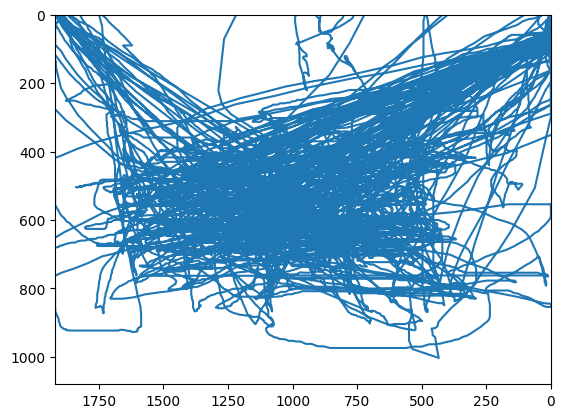

In [19]:
plt.plot(df.X, df.Y)
plt.xlim(0,1920)
plt.ylim(0,1080)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()